In [1]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=f2620125876f4e1e2fcc5566d5aac2f9eb74280d10ece00e2be8d9f41571325e
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import FileLink
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(0)

import random
import shutil
import cv2
import os


In [3]:
dataset_path = './dataset'

## Build Dataset

In [4]:
%%bash
rm -rf dataset
mkdir -p dataset/covid
mkdir -p dataset/normal

### Covid xray dataset

In [5]:
samples = 25

In [6]:
covid_dataset_path = '../input/covid-chest-xray'

In [7]:
# construct the path to the metadata CSV file and load it
csvPath = os.path.sep.join([covid_dataset_path, "metadata.csv"])
df = pd.read_csv(csvPath)

# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    
    
    if row["finding"] != "COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])

    # if the input image file does not exist (there are some errors in
    # the COVID-19 metadeta file), ignore the row
    if not os.path.exists(imagePath):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/covid", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

### Build normal xray dataset

In [8]:
pneumonia_dataset_path ='../input/chest-xray-pneumonia/chest_xray'

In [9]:
basePath = os.path.sep.join([pneumonia_dataset_path, "train", "NORMAL"])
imagePaths = list(paths.list_images(basePath))

# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = imagePath.split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/normal", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

## Plot x-rays

Helper function to plot the images in a grid

In [10]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [11]:
normal_images = list(paths.list_images(f"{dataset_path}/normal"))
covid_images = list(paths.list_images(f"{dataset_path}/covid"))

In [12]:
normal_images

['./dataset/normal/NORMAL2-IM-1006-0001.jpeg',
 './dataset/normal/IM-0199-0001.jpeg',
 './dataset/normal/IM-0478-0001.jpeg',
 './dataset/normal/NORMAL2-IM-1322-0001.jpeg',
 './dataset/normal/IM-0619-0001.jpeg',
 './dataset/normal/IM-0664-0001.jpeg',
 './dataset/normal/NORMAL2-IM-0599-0001.jpeg',
 './dataset/normal/IM-0668-0001.jpeg',
 './dataset/normal/NORMAL2-IM-1026-0001.jpeg',
 './dataset/normal/IM-0375-0001.jpeg',
 './dataset/normal/NORMAL2-IM-0956-0001.jpeg',
 './dataset/normal/IM-0262-0001.jpeg',
 './dataset/normal/IM-0541-0001.jpeg',
 './dataset/normal/NORMAL2-IM-0808-0001.jpeg',
 './dataset/normal/NORMAL2-IM-0723-0001.jpeg',
 './dataset/normal/NORMAL2-IM-0486-0001.jpeg',
 './dataset/normal/NORMAL2-IM-1293-0001.jpeg',
 './dataset/normal/IM-0654-0001.jpeg',
 './dataset/normal/NORMAL2-IM-0627-0001.jpeg',
 './dataset/normal/IM-0737-0001.jpeg',
 './dataset/normal/IM-0656-0001-0001.jpeg',
 './dataset/normal/NORMAL2-IM-1117-0001.jpeg',
 './dataset/normal/IM-0702-0001.jpeg',
 './datase

In [13]:
covid_images

['./dataset/covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 './dataset/covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png',
 './dataset/covid/ryct.2020200034.fig2.jpeg',
 './dataset/covid/16654_4_1.jpg',
 './dataset/covid/covid-19-pneumonia-58-day-7.jpg',
 './dataset/covid/covid-19-pneumonia-evolution-over-a-week-1-day0-PA.jpg',
 './dataset/covid/ciaa199.pdf-001-b.png',
 './dataset/covid/AR-1.jpg',
 './dataset/covid/covid-19-pneumonia-15-PA.jpg',
 './dataset/covid/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg',
 './dataset/covid/nejmc2001573_f1a.jpeg',
 './dataset/covid/covid-19-pneumonia-12.jpg',
 './dataset/covid/covid-19-pneumonia-mild.JPG',
 './dataset/covid/covid-19-pneumonia-14-PA.png',
 './dataset/covid/2-chest-filmc.jpg',
 './dataset/covid/F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg',
 './dataset/covid/ryct.2020200034.fig5-day0.jpeg',
 './dataset/covid/covid-19-pneumonia-30-PA.jpg',
 './dataset/covid/88de9d8c39e946abd495b37cd07d89e5-2ee

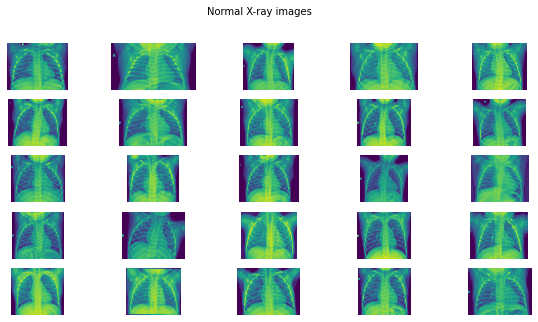

In [14]:
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

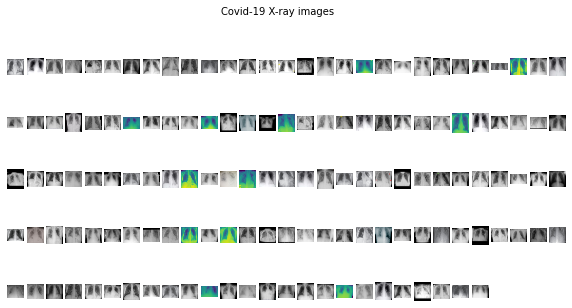

In [15]:
plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")

## Data preprocessing

In [16]:
# grab the list of images in our dataset directory, then initialize


print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))

data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color , and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    image_np = (image).flatten()
    data.append(image_np)
    labels.append(label)
    
# convert the data and labels to NumPy arrays while scaling the pixel
data_train = np.array(data) / 255
labels_train = np.array(labels)

[INFO] loading images...


In [17]:
data

[array([210, 212, 212, ...,  58,  58, 255], dtype=uint8),
 array([  4,   0,   0, ..., 250, 250, 255], dtype=uint8),
 array([ 70,  70,  70, ...,  51,  51, 255], dtype=uint8),
 array([ 46,  46,  46, ...,  11,  11, 255], dtype=uint8),
 array([  0,   0,   0, ...,  86,  86, 255], dtype=uint8),
 array([127, 127, 127, ..., 134, 134, 255], dtype=uint8),
 array([ 38,  38,  38, ...,   0,   0, 255], dtype=uint8),
 array([ 47,  24,   4, ..., 162, 160, 255], dtype=uint8),
 array([177, 177, 177, ...,  46,  46, 255], dtype=uint8),
 array([190, 190, 190, ...,  63,  63, 255], dtype=uint8),
 array([ 71,  69,  68, ...,  65,  65, 255], dtype=uint8),
 array([  1,   1,   1, ..., 194, 194, 255], dtype=uint8),
 array([  0,   0,   0, ...,   9,   9, 255], dtype=uint8),
 array([  1,   1,   1, ...,  73,  73, 255], dtype=uint8),
 array([ 47,  47,  47, ...,  42,  16, 255], dtype=uint8),
 array([  1,   1,   1, ...,   1,   1, 255], dtype=uint8),
 array([  1,   1,   1, ..., 156, 156, 255], dtype=uint8),
 array([  0,  

In [18]:
len(data)

166

In [19]:
labels

['covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',


In [20]:
len(labels)

166

In [21]:
data_train

array([[0.82352941, 0.83137255, 0.83137255, ..., 0.22745098, 0.22745098,
        1.        ],
       [0.01568627, 0.        , 0.        , ..., 0.98039216, 0.98039216,
        1.        ],
       [0.2745098 , 0.2745098 , 0.2745098 , ..., 0.2       , 0.2       ,
        1.        ],
       ...,
       [0.19607843, 0.19607843, 0.19607843, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19215686, 0.19215686, 0.19215686, ..., 0.        , 0.        ,
        1.        ]])

In [22]:
labels_train

array(['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'cov

In [23]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels_train_y = lb.fit_transform(labels_train)
labels_train_cat = to_categorical(labels_train_y)

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing

(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.60, stratify=labels, random_state=42)



In [24]:
X_train

[array([  0,   0,   0, ...,   0,   0, 255], dtype=uint8),
 array([252, 252, 252, ...,  97,  96, 255], dtype=uint8),
 array([  5,   5,   5, ...,  35,  35, 255], dtype=uint8),
 array([ 87,  87,  87, ...,   0,   0, 255], dtype=uint8),
 array([  0,   0,   0, ..., 153, 153, 255], dtype=uint8),
 array([  0,   0,   0, ...,   9,   9, 255], dtype=uint8),
 array([  9,   9,   9, ..., 162, 162, 255], dtype=uint8),
 array([ 29,  24,  25, ..., 210, 210, 255], dtype=uint8),
 array([  1,   1,   1, ..., 194, 194, 255], dtype=uint8),
 array([193, 193, 193, ...,  57,  57, 255], dtype=uint8),
 array([  1,   1,   1, ...,  38,   6, 255], dtype=uint8),
 array([  1,   1,   1, ..., 156, 156, 255], dtype=uint8),
 array([240, 240, 240, ..., 116, 115, 255], dtype=uint8),
 array([  0,   0,   0, ..., 136, 136, 255], dtype=uint8),
 array([  0,   0,   0, ...,   0,   0, 255], dtype=uint8),
 array([  0,   0,   0, ...,   0,   0, 255], dtype=uint8),
 array([  1,   1,   1, ...,  53,  54, 255], dtype=uint8),
 array([  0,  

In [25]:
y_train

['normal',
 'covid',
 'covid',
 'normal',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'covid',
 'normal',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'normal',
 'covid',
 'covid',
 'normal',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal']

## Comparison of Calibration of Classifiers

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve



# Create classifiers
lr = LogisticRegression(max_iter=10000)
gnb = GaussianNB()
svc = LinearSVC(C=1.0, max_iter=10000)
rfc = RandomForestClassifier()





# FIT MODELS

> /opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
>   "the number of iterations.", ConvergenceWarning)

In [27]:
LR_Model = lr.fit(X_train, y_train)


In [28]:
GNB_Model = gnb.fit(X_train, y_train)


In [29]:
SVC_Model = svc.fit(X_train, y_train)


In [30]:
RFC_Model = rfc.fit(X_train, y_train)

# Now save the model

In [31]:
import pickle

with open('LR_model.pkl', 'wb') as f1:
    pickle.dump(LR_Model,f1)
    f1.close()

with open('GNB_model.pkl', 'wb') as f2:
    pickle.dump(GNB_Model,f2)
    f2.close()

with open('SVM_model.pkl', 'wb') as f3:
    pickle.dump(SVC_Model,f3)
    f3.close()

with open('RF_model.pkl', 'wb') as f4:
    pickle.dump(RFC_Model,f4)
    f4.close()


    


In [32]:
from IPython.display import FileLink

FileLink(r'LR_model.pkl')


/kaggle/working/LR_model.pkl

In [33]:
FileLink(r'GNB_model.pkl')


/kaggle/working/GNB_model.pkl

In [34]:
FileLink(r'SVM_model.pkl')


/kaggle/working/SVM_model.pkl

In [35]:
FileLink(r'RF_model.pkl')

/kaggle/working/RF_model.pkl

# Metrics

In [36]:
from sklearn.metrics import accuracy_score


LR_y_pred = LR_Model.predict(X_test)
GNB_y_pred = GNB_Model.predict(X_test)
SVC_y_pred = SVC_Model.predict(X_test)
RFC_y_pred = RFC_Model.predict(X_test)


# accuracy_score(y_true, y_pred)


In [37]:
LR_acc_sc = accuracy_score(y_test, LR_y_pred)
LR_acc_sc

0.99

In [38]:
GNB_acc_sc = accuracy_score(y_test, GNB_y_pred)
GNB_acc_sc

0.97

In [39]:
SVC_acc_sc = accuracy_score(y_test, SVC_y_pred)
SVC_acc_sc

0.99

In [40]:
RFC_acc_sc = accuracy_score(y_test, RFC_y_pred)
RFC_acc_sc

0.96

In [41]:
print('LogisticRegression score: %f' % LR_Model.score(X_test, y_test))
print('Naive Bayes score: %f' % GNB_Model.score(X_test, y_test))
print('SVM score: %f' % SVC_Model.score(X_test, y_test))
print('Random Forest score: %f' % RFC_Model.score(X_test, y_test))

LogisticRegression score: 0.990000
Naive Bayes score: 0.970000
SVM score: 0.990000
Random Forest score: 0.960000


# Confusion Matrix

In [42]:
import itertools

In [43]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(8,8), dpi=100)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    savefilename = title+'.png'
        
    plt.savefig(savefilename)
    

In [44]:
cm_plot_labels = ['covid -ve','covid +ve']

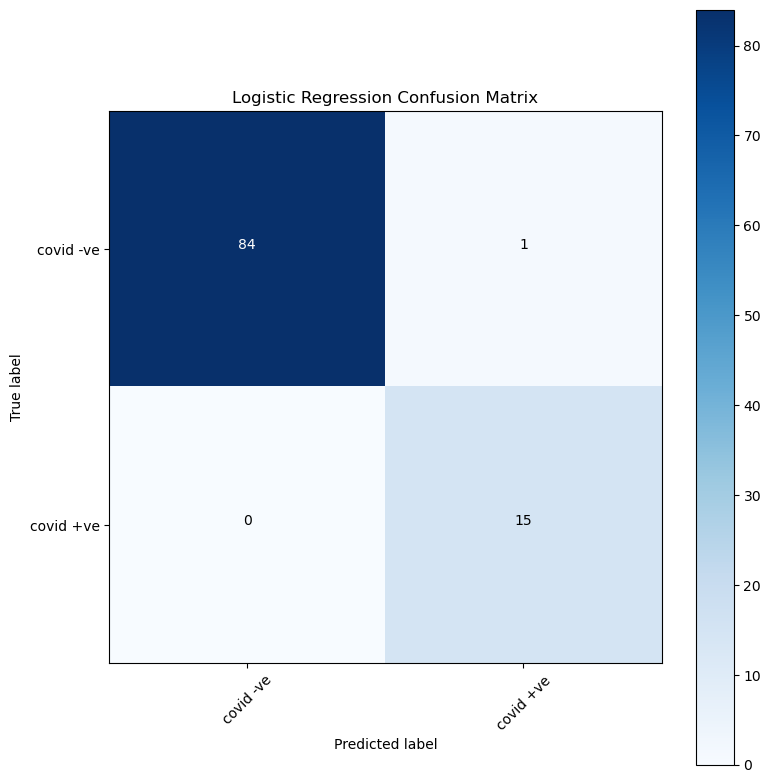

In [45]:
cm_lr = confusion_matrix(y_test, LR_y_pred)
plot_confusion_matrix(cm=cm_lr, classes=cm_plot_labels, title='Logistic Regression Confusion Matrix')


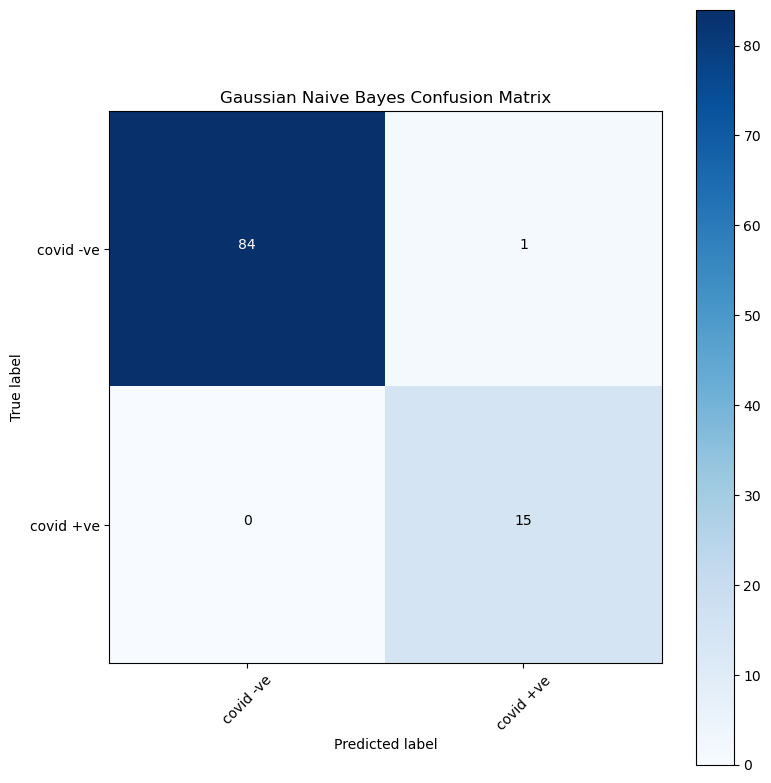

In [46]:
cm_nb = confusion_matrix(y_test, GNB_y_pred)
plot_confusion_matrix(cm=cm_lr, classes=cm_plot_labels, title='Gaussian Naive Bayes Confusion Matrix')


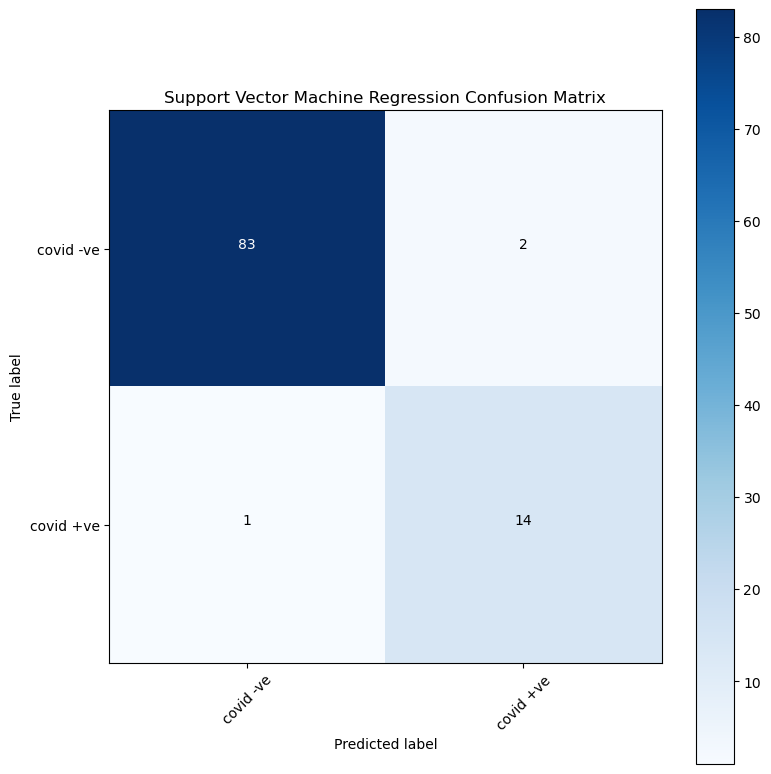

In [47]:
cm_svc = confusion_matrix(y_test, SVC_y_pred)
plot_confusion_matrix(cm=cm_nb, classes=cm_plot_labels, title='Support Vector Machine Regression Confusion Matrix')


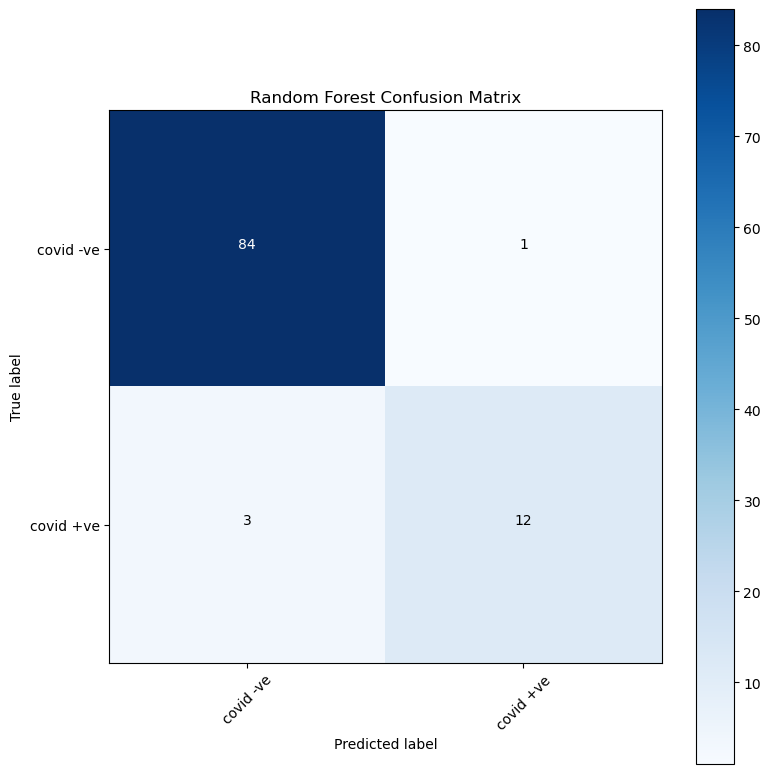

In [48]:
cm_rf = confusion_matrix(y_test, RFC_y_pred)
plot_confusion_matrix(cm=cm_rf, classes=cm_plot_labels, title='Random Forest Confusion Matrix')


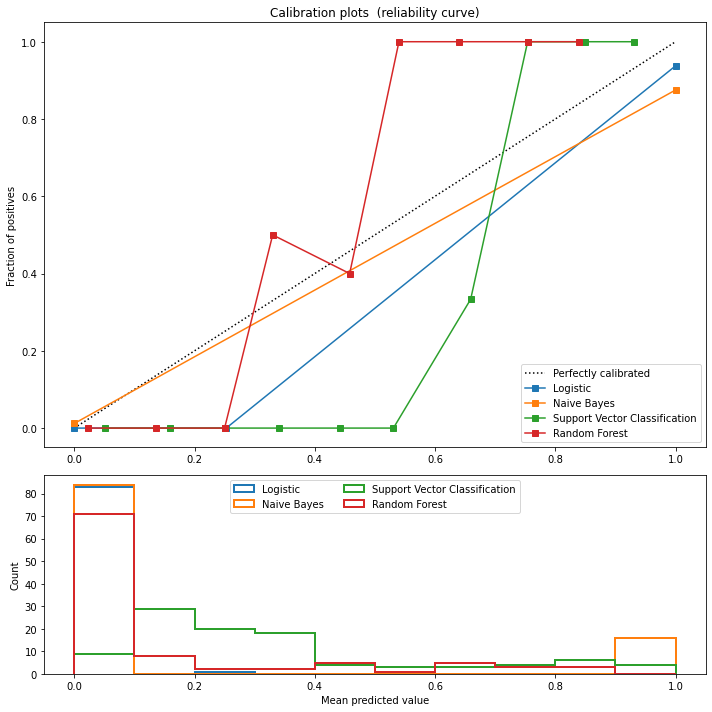

In [49]:

# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


Test on covid image:

In [50]:
imagefile = '../input/covid-chest-xray/images/1-s2.0-S1684118220300682-main.pdf-003-b1.png'

test_image = cv2.imread(imagefile)
test_image = cv2.cvtColor(test_image, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (224, 224))
test_img = test_image.flatten().reshape(1, -1)


LR_pred = LR_Model.predict(test_img)
print(LR_pred)

GNB_pred = GNB_Model.predict(test_img)
print(GNB_pred)

SVC_pred = SVC_Model.predict(test_img)
print(SVC_pred)

RFC_pred = RFC_Model.predict(test_img)
print(RFC_pred)



['covid']
['covid']
['covid']
['covid']


Test on normal image:

In [51]:


test_image = cv2.imread('../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg')
test_image = cv2.cvtColor(test_image, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (224, 224))
test_img = test_image.flatten().reshape(1, -1)


LR_pred = LR_Model.predict(test_img)
print(LR_pred)

GNB_pred = GNB_Model.predict(test_img)
print(GNB_pred)

SVC_pred = SVC_Model.predict(test_img)
print(SVC_pred)

RFC_pred = RFC_Model.predict(test_img)
print(RFC_pred)



['normal']
['normal']
['normal']
['normal']
